# Telco Churn Prediction

# About Dataset
## Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

## Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

**The data set includes information about:***

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

# Implementations

# 1. Imported Required Libraries

In [1]:
# Data manipulation and analysis library
import pandas as pd
import numpy as np

# data visualizations and plots
import matplotlib.pyplot as plt
import seaborn as sns

# Multicollinearity
# the statsmodels library to calculate the Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Split the dataset
from sklearn.model_selection import train_test_split

# Module from scikit-learn contains Machine Learning Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Evaluating the performance of machine learning models
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import auc

# Standardization
from sklearn.preprocessing import StandardScaler

# K-fold cross validation
# a technique for splitting data into multiple folds for model training and evaluation
from sklearn.model_selection import KFold 

# Score evaluation
from sklearn.model_selection import cross_val_score 

# Voting Classifier
# an ensemble method in scikit-learn that combines the predictions of multiple machine learning models to make a final prediction
from sklearn.ensemble import VotingClassifier

# 2. Dataset Information

In [2]:
import pandas as pd

df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
list(df.columns.values)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

The data set includes information about:

1. Customers who left within the last month – the column is called Churn

2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

3. Customer account information - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

4. Demographic info about customers – gender, age range, and if they have partners and dependents

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Variables are of different types, which are categorized below Categorical:

1. Binary (7): SeniorCitizen, gender, Partner, Dependents, PhoneService, PaperlessBilling, and Churn

2. Multimonial (11): CustomerID, MultipleLines,InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaymentMethod

3. Continuous(3): TotalCharges, MonthlyCharges and Tenure

-> The target the we will use to guide the exploration is Churn. -> The Total Charges is observed to be stored in string datatype, meanwhile it should be stored as numerical data type.

# 3. Data Preparation

## 3.1 Detecting Missing Values

An in depth analysis can reveal some indirect missingness in the dataset (which can be in form of blankspaces). We will drop **customer ID** first, then transform the **Total Charges** into numerical data.

In [6]:
# Data manipulation

df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Convert 'Total Charges' into numerical values

# erros = 'coerce' is used if there are any non-numeric values in the 'TotalCharges' column, they will be replaced with NaN.

df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors = 'coerce') 

In [8]:
df['TotalCharges'].dtype

dtype('float64')

In [9]:
# Check for missing values

df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Results return 11 missing values in **Total Charges**. We will calculate how much proportion they take in the dataset to decide the handling missing values strategy.

In [10]:
# Calculate the missing values 
def missing_values(n):
    df_m=pd.DataFrame()
    df_m["missing_values, %"]=df.isnull().sum()*100/len(df.isnull())
    df_m["missing_values, sum"]=df.isnull().sum()
    return df_m.sort_values(by="missing_values, %", ascending=False)

In [11]:
missing_values(df)

,"missing_values, %","missing_values, sum"
TotalCharges,0.156183,11
gender,0.000000,0
SeniorCitizen,0.000000,0
MonthlyCharges,0.000000,0
PaymentMethod,0.000000,0
PaperlessBilling,0.000000,0
Contract,0.000000,0
StreamingMovies,0.000000,0
StreamingTV,0.000000,0
TechSupport,0.000000,0


Since the missing values of **Total Charges** comprise of the dataset 0.16%, we have two options:

1. Decide to delete them since they only comprise a small percentage of the dataset.
2. Decide to not delete them and impute with mean value.

However, we will assess these values in detail to identify whether there is a reason behind then finalise the decision.

In [12]:
# Filter df to find rows that have missing values in 'Total Charges'

df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


From the entries above, we detect inconsistency in **tenure, monthly charges and total charges values**.

- Tenure refers to the number of months that a customer has been with the company, therefore, the "0" entry seems to not make sense and appears skeptical.
- Considering Monthly Charges column in which charged amounts are still recored. We assume that the "0" in tenure the may present a short amount of time (less than 1 month), and they are new customers who haven't completed a billing cycle.
We will double check if there are any other '0' values in the **tenure** column.

In [13]:
# Filter df to find the index positions of rows where the 'tenure' column has a value of 0

df[df['tenure'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

There are no other missing values in the tenure column. We now proceed to handling missing values.

Having said that the missing values in Total Charges could possibly represent new customers who have not finish the billing cycle, we decide to not delete them and replace with mean value.

In [14]:
# Impute missing values with corresponding monthly charges

df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)
df[df['tenure'] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,2283.300441,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,2283.300441,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,2283.300441,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,2283.300441,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,2283.300441,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,2283.300441,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,2283.300441,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,2283.300441,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,2283.300441,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,2283.300441,No


In [15]:
# Check for missing values again
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 3.2 Detecting Outliers

In [16]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## Numerical columns

In [17]:
# Define numerical columns

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [18]:
# Describing descriptive stats of the data
df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2283.300441,2265.000258,18.80,402.225,1400.55,3786.60,8684.80


In [19]:
# Detecting outliers
def detect_outliers_iqr(data):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    # Calculate the IQR
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find the outliers
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    
    return outliers

In [20]:
# Apply outlier detection to all numerical columns
outliers_by_column = {}
for column in numerical_cols:
    data_column = df[column]
    outliers = detect_outliers_iqr(data_column)
    outliers_by_column[column] = outliers

# Print the outliers for each column
for column, outliers in outliers_by_column.items():
    print(f"Outliers in {column}: {outliers}")

Outliers in tenure: []
Outliers in MonthlyCharges: []
Outliers in TotalCharges: []


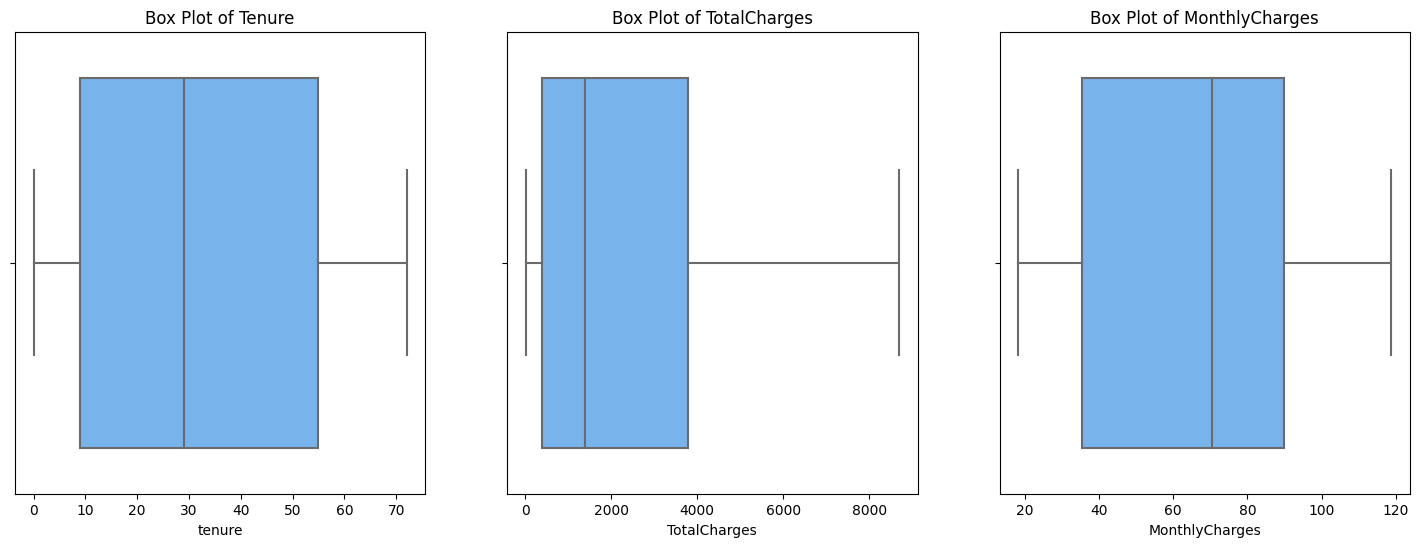

In [21]:
# Create separate box plots for 'tenure', 'TotalCharges', and 'MonthlyCharges'
plt.figure(figsize=(18, 6))

# Box Plot of 'tenure'
plt.subplot(131)  # 1 row, 3 columns, plot 1
sns.boxplot(x=df['tenure'], color='#66b3ff')
plt.title("Box Plot of Tenure")

# Box Plot of 'TotalCharges'
plt.subplot(132)  # 1 row, 3 columns, plot 2
sns.boxplot(x=df['TotalCharges'], color='#66b3ff')
plt.title("Box Plot of TotalCharges")

# Box Plot of 'MonthlyCharges'
plt.subplot(133)  # 1 row, 3 columns, plot 3
sns.boxplot(x=df['MonthlyCharges'], color='#66b3ff')
plt.title("Box Plot of MonthlyCharges")

plt.show()

We confirm that there is no outlier in the numerical features.

## 3.3. Label Encode Binary Data

- Independent variables for machine learning models typically must be only numerical values. 
- Therefore, label Encoding Binary Data is used for all categorical variables with only two unique values.

##  Categorical Variables

In [22]:
# Check for unique values to be make informed encoding decision  
unique_counts = df.nunique()
print("Unique Value Counts:")
print(unique_counts)

Unique Value Counts:
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [23]:
# Label-Encoding for Categorical Data
# Change data type for categorical data variables
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

df[cols] = df[cols].astype('category')

# Label encoding for categorical data variables
for column in cols:
    df[column] = df[column].cat.codes

# Check data types of all columns
print(df.dtypes)

gender                 int8
SeniorCitizen          int8
Partner                int8
Dependents             int8
tenure                int64
PhoneService           int8
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling       int8
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                  int8
dtype: object


# 4. Exploring Data Analysis

## 4.1 Visualisng data

C:\Users\Muthu Ishwarya\AppData\Local\Temp\ipykernel_19128\683169402.py:34: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend(g_labels,c_labels)


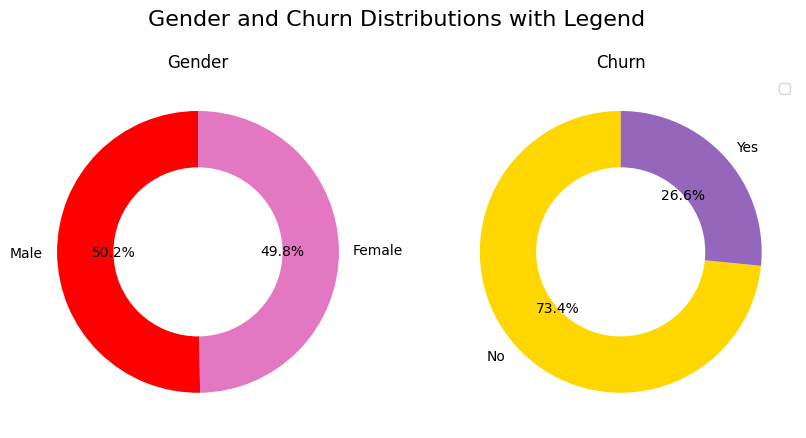

In [24]:
import matplotlib.pyplot as plt

# Data
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
gender_values = [939, 930]
churn_values = [5163, 1869]

# Colors
colors1 = ["red", '#e377c2']  # Define four colors for the categories
colors2 =["gold", '#9467bd']

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the "Gender" donut chart with a legend
axs[0].pie(gender_values, labels=g_labels,colors=colors1, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})
axs[0].set_title('Gender')
#axs[0].legend(g_labels, title="Gender")

# Plot the "Churn" donut chart with a legend
axs[1].pie(churn_values, labels=c_labels,colors=colors2, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})
axs[1].set_title('Churn')
#axs[1].legend(c_labels, title="Churn")

# Add a circle in the center to make it a donut chart
for ax in axs:
    center_circle = plt.Circle((0, 0), 0.3, color='white')
    ax.add_artist(center_circle)


# Display the plot
plt.suptitle("Gender and Churn Distributions with Legend", fontsize=16)
plt.legend(g_labels,c_labels)
plt.show()


- 26.5 % of customers switched to another firm.
- Customers are 49.5 % female and 50.5 % male.

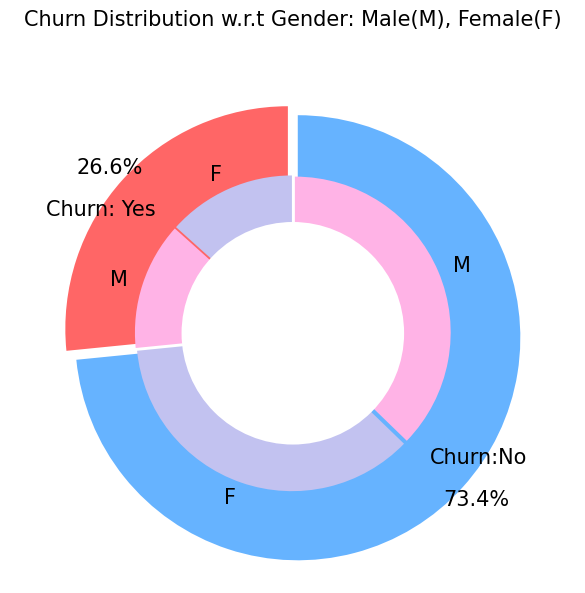

In [25]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

There is negligible difference in customer percentage/ count who chnaged the service provider. Both genders behaved in similar fashion when it comes to migrating to another service provider/ firm.

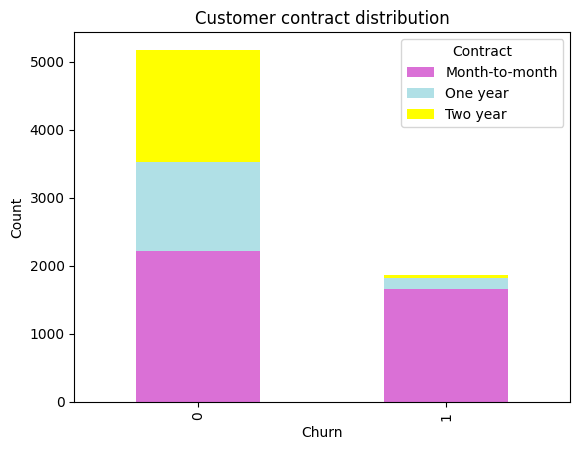

In [26]:
# Define the custom colors
colors = {
    "Month-to-month": "orchid",
    "One year": "powderblue",
    "Two year": "yellow"
}

# Group data by "Churn" and "Contract"
grouped = df.groupby(["Churn", "Contract"]).size().unstack(fill_value=0)

# Create the histogram with custom colors
ax = grouped.plot(kind="bar", stacked=True, color=[colors[c] for c in grouped.columns])

# Customize the plot
ax.set_title("Customer contract distribution")
ax.set_xlabel("Churn")
ax.set_ylabel("Count")
ax.legend(title="Contract")

# Show the plot
plt.show()


About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract

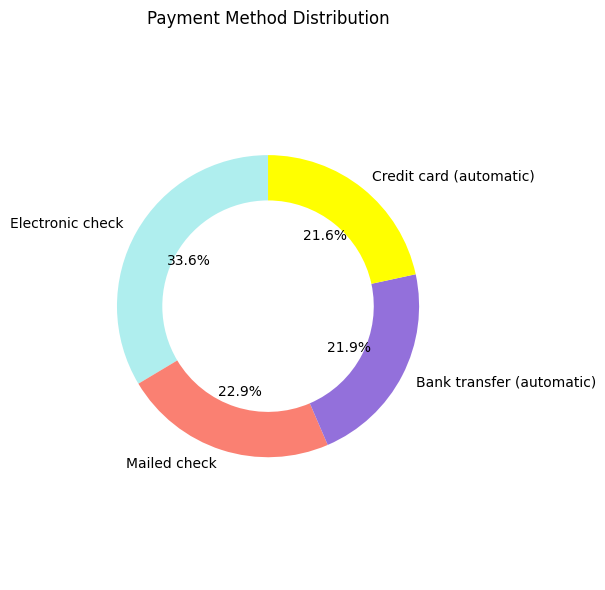

In [27]:
# Unique labels and their counts
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

# Define custom colors
colors = ["paleturquoise", 'salmon', "mediumpurple", 'yellow']

# Create a pie chart with custom colors
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.3})
plt.title("Payment Method Distribution")

# Show the plot
plt.axis('equal')
plt.tight_layout()
plt.show()


C:\Users\Muthu Ishwarya\AppData\Local\Temp\ipykernel_19128\3203880691.py:20: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


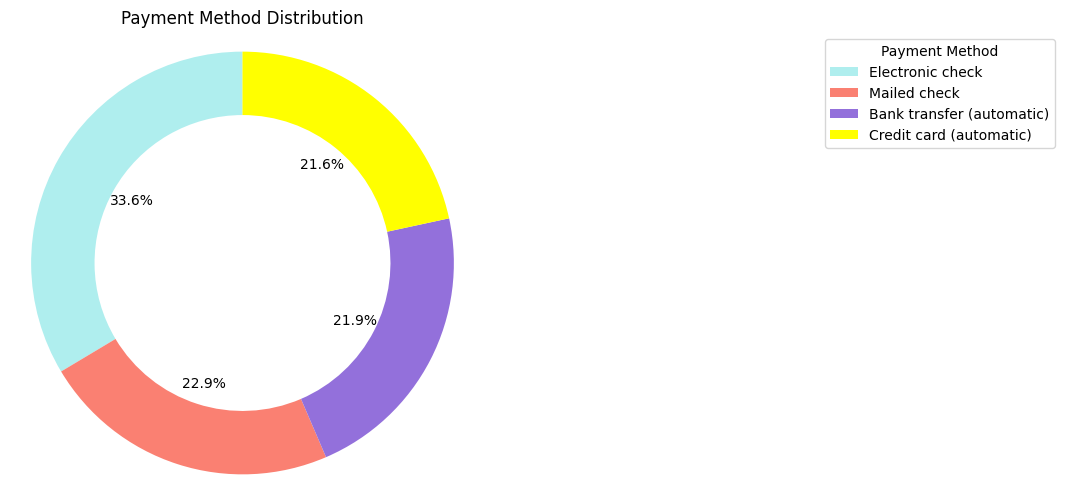

In [28]:
# Unique labels and their counts
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

# Define custom colors
colors = ["paleturquoise", 'salmon', "mediumpurple", 'yellow']

# Create a pie chart with custom colors
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(values,colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.3})

# Adjust legend position
legend = plt.legend(labels, title="Payment Method", loc="upper center", bbox_to_anchor=(2.0, 1.0))

# Set the title
plt.title("Payment Method Distribution")

# Show the plot
plt.axis('equal')
plt.tight_layout()
plt.show()


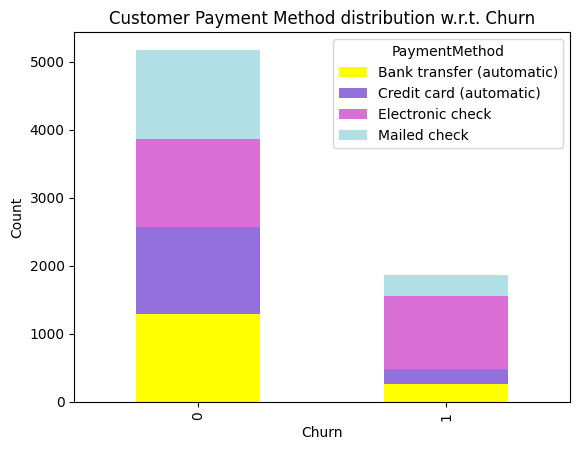

In [29]:
# Define the custom colors
colors = {
    "Electronic check": "orchid",
    "Mailed check": "powderblue",
    "Bank transfer (automatic)": "yellow",
    "Credit card (automatic)":"mediumpurple"
}

# Group data by "Churn" and "Contract"
grouped = df.groupby(["Churn", "PaymentMethod"]).size().unstack(fill_value=0)

# Create the histogram with custom colors
ax = grouped.plot(kind="bar", stacked=True, color=[colors[c] for c in grouped.columns])

# Customize the plot
ax.set_title("Customer Payment Method distribution w.r.t. Churn")
ax.set_xlabel("Churn")
ax.set_ylabel("Count")
ax.legend(title="PaymentMethod")

# Show the plot
plt.show()


- Major customers who moved out were having Electronic Check as Payment Method.
- Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

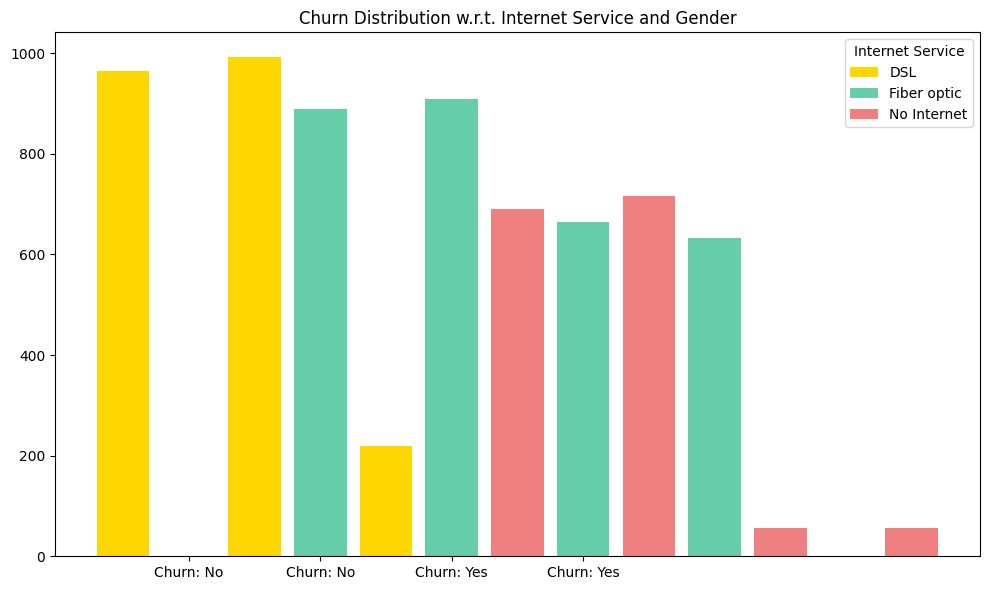

In [30]:
internet_services = ['DSL', 'Fiber optic', 'No Internet']
churn_labels = ['Churn: No', 'Churn: No', 'Churn: Yes', 'Churn: Yes']
gender = ['Female', 'Male', 'Female', 'Male']

values = {
    'DSL': [965, 992, 219, 240],
    'Fiber optic': [889, 910, 664, 633],
    'No Internet': [690, 717, 56, 57],
}

# Custom colors for Internet Services
custom_colors = ['gold', 'mediumaquamarine', 'lightcoral']

# Create x positions for bars
x = np.arange(len(churn_labels))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through Internet Service categories
for i, service in enumerate(internet_services):
    values_list = values[service]
    bars = plt.bar(x + i * 1.5, values_list, width=0.4, label=service, color=custom_colors[i])

# Set the x-axis labels
ax.set_xticks(x + 0.5)
ax.set_xticklabels(churn_labels)

# Add a legend
ax.legend(title="Internet Service")

# Set the title
ax.set_title("Churn Distribution w.r.t. Internet Service and Gender")

# Show the plot
plt.tight_layout()
plt.show()


- A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.
- Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

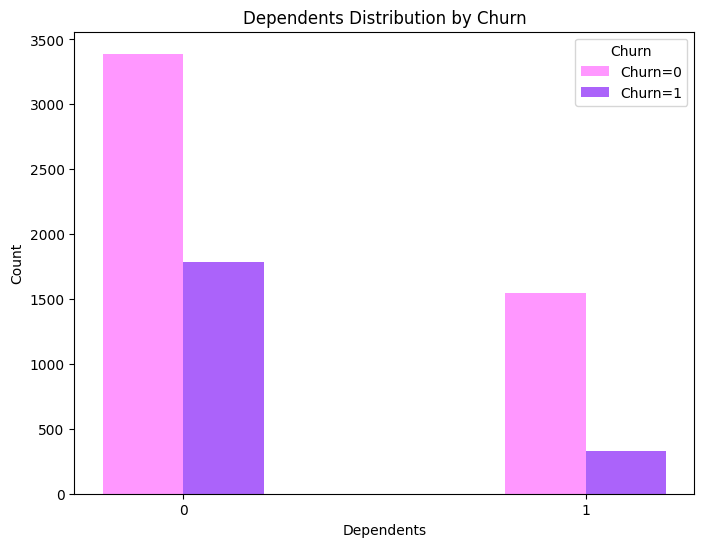

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
dependents = df['Dependents'].unique()
churn_values = df['Churn'].unique()

# Grouped bar chart data
data = []
for dependent in dependents:
    counts = []
    for churn_value in churn_values:
        count = len(df[(df['Dependents'] == dependent) & (df['Churn'] == churn_value)])
        counts.append(count)
    data.append(counts)

# Set the bar width and positions
bar_width = 0.2
index = np.arange(len(dependents))

# Color mapping
color_map = ["#FF97FF","#AB63FA"]

fig, ax = plt.subplots(figsize=(8, 6))

legend_labels = [f'Churn={churn}' for churn in churn_values]

for i, (dependent, counts) in enumerate(zip(dependents, data)):
    ax.bar(index + i * bar_width, counts, bar_width, label=f'Dependents={dependent}', color=color_map[dependent])

ax.set_xlabel('Dependents')
ax.set_ylabel('Count')
ax.set_title('Dependents Distribution by Churn')
ax.set_xticks(index + bar_width * (len(churn_values) - 1) / 2)
ax.set_xticklabels(dependents)
ax.legend(legend_labels, title='Churn')

plt.show()


- Customers without dependents are more likely to churn

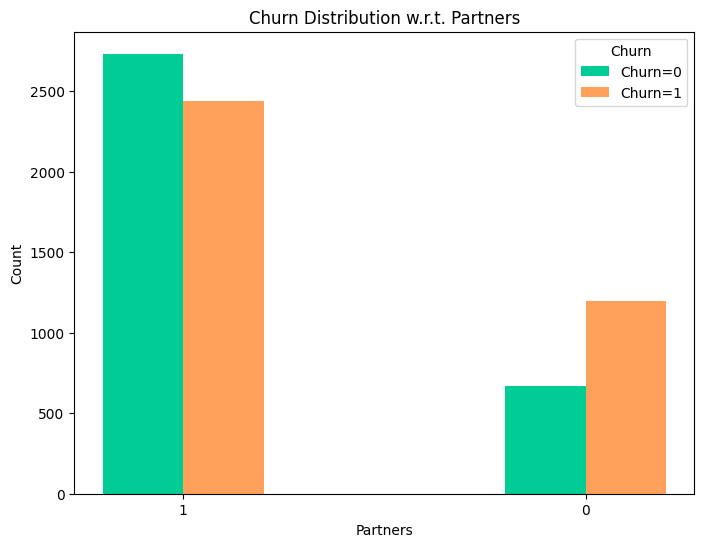

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
partners = df['Partner'].unique()
churn_values = df['Churn'].unique()

# Grouped bar chart data
data = []
for partner in partners:
    counts = []
    for churn_value in churn_values:
        count = len(df[(df['Partner'] == partner) & (df['Churn'] == churn_value)])
        counts.append(count)
    data.append(counts)

# Set the bar width and positions
bar_width = 0.2
index = np.arange(len(partners))

# Color mapping
color_map = ['#FFA15A','#00CC96']

fig, ax = plt.subplots(figsize=(8, 6))

legend_labels = [f'Churn={churn}' for churn in churn_values]

for i, (partner, counts) in enumerate(zip(partners, data)):
    ax.bar(index + i * bar_width, counts, bar_width, label=f'Partner={partner}', color=color_map[partner])

ax.set_xlabel('Partners')
ax.set_ylabel('Count')
ax.set_title('Churn Distribution w.r.t. Partners')
ax.set_xticks(index + bar_width * (len(churn_values) - 1) / 2)
ax.set_xticklabels(partners)
ax.legend(legend_labels, title='Churn')

plt.show()


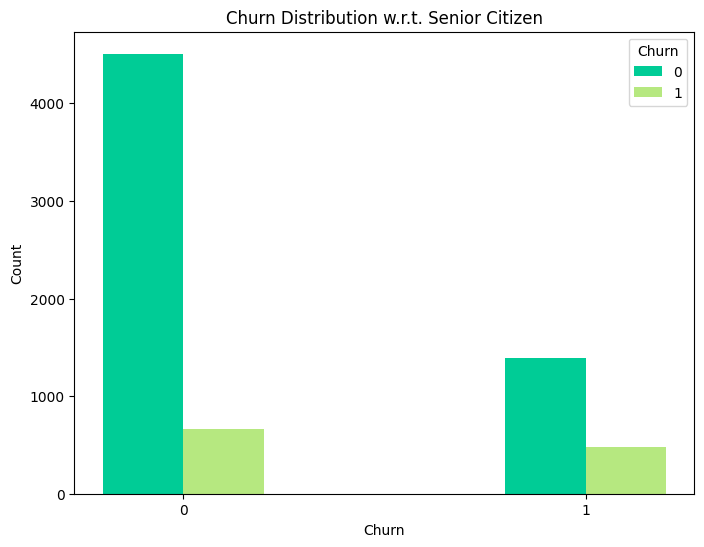

In [33]:
import matplotlib.pyplot as plt

# Sample data
senior_citizen_values = df['SeniorCitizen'].unique()
churn_values = df['Churn'].unique()

# Grouped bar chart data
data = []
for senior_citizen in senior_citizen_values:
    counts = []
    for churn_value in churn_values:
        count = len(df[(df['SeniorCitizen'] == senior_citizen) & (df['Churn'] == churn_value)])
        counts.append(count)
    data.append(counts)

# Set the bar width and positions
bar_width = 0.2
index = [0, 1]

# Color mapping
color_map =['#00CC96','#B6E880']

fig, ax = plt.subplots(figsize=(8, 6))

legend_labels = [f'{senior_citizen}' for senior_citizen in senior_citizen_values]

for i, (senior_citizen, counts) in enumerate(zip(senior_citizen_values, data)):
    ax.bar(index, counts, bar_width, label=f'Senior Citizen={senior_citizen}', color=color_map[senior_citizen])
    index = [x + bar_width for x in index]

ax.set_xlabel('Churn')
ax.set_ylabel('Count')
ax.set_title('Churn Distribution w.r.t. Senior Citizen')
ax.set_xticks([0.1, 1.1])
ax.set_xticklabels(senior_citizen_values)
ax.legend(legend_labels, title='Churn')

plt.show()


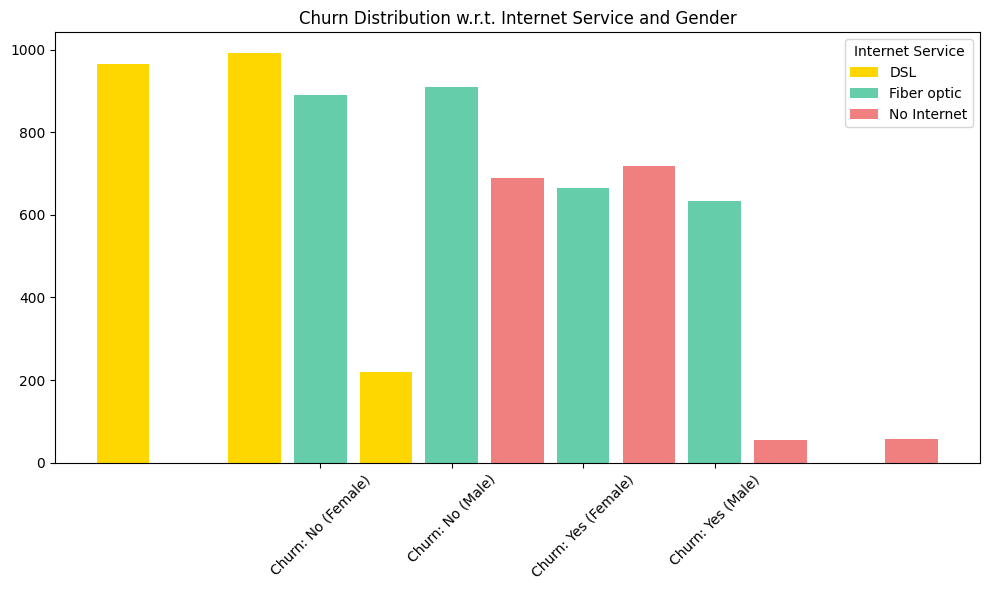

In [34]:
internet_services = ['DSL', 'Fiber optic', 'No Internet']
churn_labels = ['Churn: No (Female)', 'Churn: No (Male)', 'Churn: Yes (Female)', 'Churn: Yes (Male)']

values = {
    'DSL': [965, 992, 219, 240],
    'Fiber optic': [889, 910, 664, 633],
    'No Internet': [690, 717, 56, 57],
}

# Custom colors for Internet Services
custom_colors = ['gold', 'mediumaquamarine', 'lightcoral']

# Create x positions for bars
x = np.arange(len(churn_labels))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through Internet Service categories
for i, service in enumerate(internet_services):
    values_list = values[service]
    bars = plt.bar(x + i * 1.5, values_list, width=0.4, label=service, color=custom_colors[i])

# Set the x-axis labels
ax.set_xticks(x + 1.5)
ax.set_xticklabels(churn_labels, rotation=45)

# Add a legend
ax.legend(title="Internet Service")

# Set the title
ax.set_title("Churn Distribution w.r.t. Internet Service and Gender")

# Show the plot
plt.tight_layout()
plt.show()


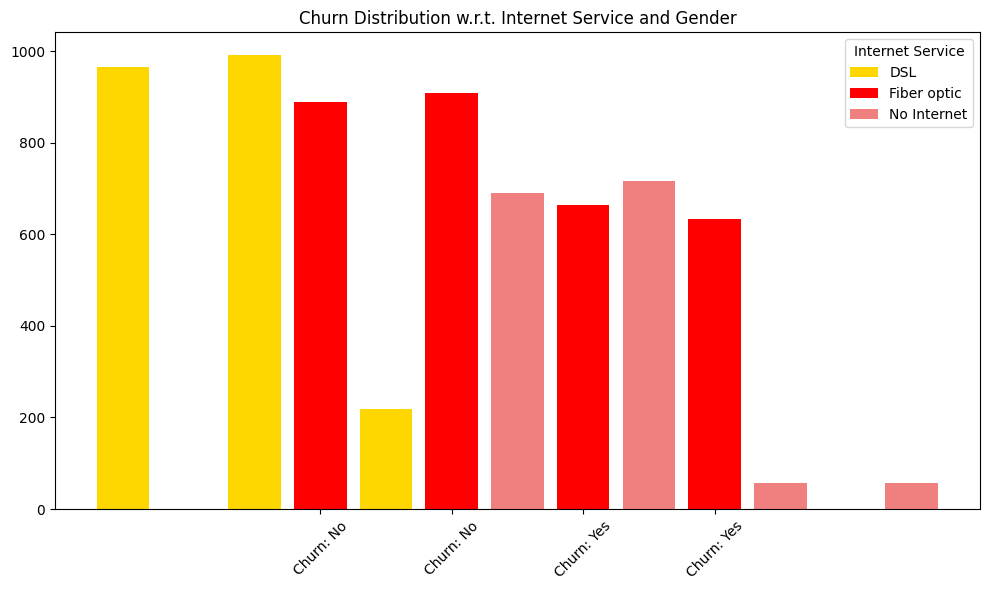

In [35]:
internet_services = ['DSL', 'Fiber optic', 'No Internet']
churn_labels = ['Churn: No', 'Churn: No', 'Churn: Yes', 'Churn: Yes']

values = {
    'DSL': [965, 992, 219, 240],
    'Fiber optic': [889, 910, 664, 633],
    'No Internet': [690, 717, 56, 57],
}

# Custom colors for Internet Services
custom_colors = ['gold', 'red', 'lightcoral']

# Create x positions for bars
x = np.arange(len(churn_labels))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through Internet Service categories
for i, service in enumerate(internet_services):
    values_list = values[service]
    bars = plt.bar(x + i * 1.5, values_list, width=0.4, label=service, color=custom_colors[i])

# Set the x-axis labels
ax.set_xticks(x + 1.5)
ax.set_xticklabels(churn_labels, rotation=45)

# Add a legend
ax.legend(title="Internet Service")

# Set the title
ax.set_title("Churn Distribution w.r.t. Internet Service and Gender")

# Show the plot
plt.tight_layout()
plt.show()


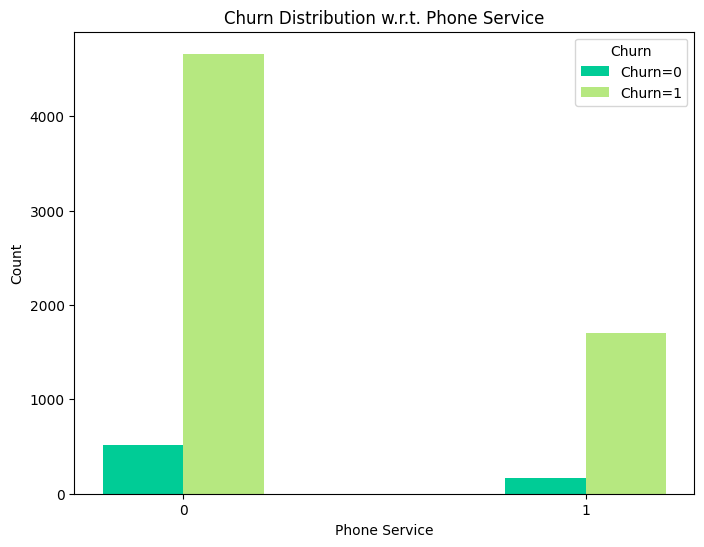

In [36]:
import matplotlib.pyplot as plt

# Sample data
phone_service_values = df['PhoneService'].unique()
churn_values = df['Churn'].unique()

# Grouped bar chart data
data = []
for phone_service in phone_service_values:
    counts = []
    for churn_value in churn_values:
        count = len(df[(df['PhoneService'] == phone_service) & (df['Churn'] == churn_value)])
        counts.append(count)
    data.append(counts)

# Set the bar width and positions
bar_width = 0.2
index = [0, 1]

# Color mapping
color_map = ['#00CC96','#B6E880']

fig, ax = plt.subplots(figsize=(8, 6))

legend_labels = [f'Churn={churn}' for churn in churn_values]

for i, (phone_service, counts) in enumerate(zip(phone_service_values, data)):
    ax.bar(index, counts, bar_width, label=f'Phone Service={phone_service}', color=color_map[phone_service])
    index = [x + bar_width for x in index]

ax.set_xlabel('Phone Service')
ax.set_ylabel('Count')
ax.set_title('Churn Distribution w.r.t. Phone Service')
ax.set_xticks([0.1, 1.1])
ax.set_xticklabels(phone_service_values)
ax.legend(legend_labels, title='Churn')

plt.show()


C:\Users\Muthu Ishwarya\AppData\Local\Temp\ipykernel_19128\3242196331.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.MonthlyCharges[df['Churn'] == 0], color='red', label='Not Churn', shade=True)
C:\Users\Muthu Ishwarya\AppData\Local\Temp\ipykernel_19128\3242196331.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.MonthlyCharges[df['Churn'] == 1], color='blue', label='Churn', shade=True)


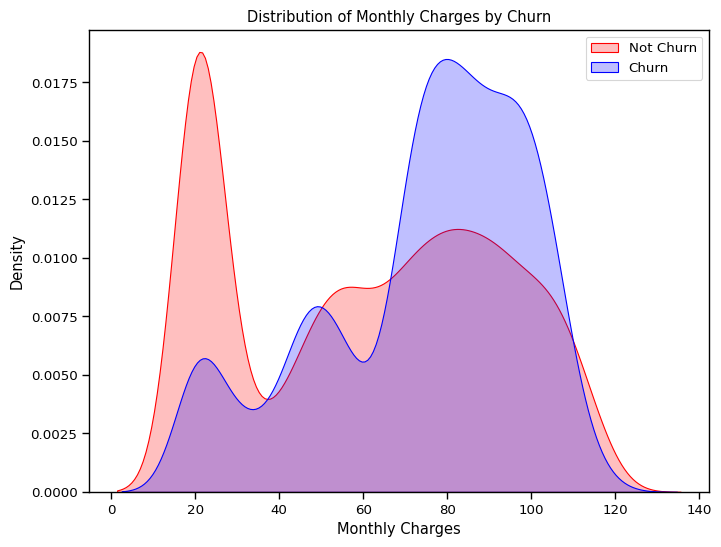

In [37]:
sns.set_context("paper", font_scale=1.1)
plt.figure(figsize=(8, 6))

# Line plot for customers who do not churn (Churn = 0)
sns.kdeplot(df.MonthlyCharges[df['Churn'] == 0], color='red', label='Not Churn', shade=True)

# Line plot for customers who churn (Churn = 1)
sns.kdeplot(df.MonthlyCharges[df['Churn'] == 1], color='blue', label='Churn', shade=True)

plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.title('Distribution of Monthly Charges by Churn')
plt.legend()

plt.show()

Customers with higher Monthly Charges are also more likely to churn

C:\Users\Muthu Ishwarya\AppData\Local\Temp\ipykernel_19128\981586339.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.TotalCharges[df['Churn'] == 0], color='red', label='Not Churn', shade=True)
C:\Users\Muthu Ishwarya\AppData\Local\Temp\ipykernel_19128\981586339.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.TotalCharges[df['Churn'] == 1], color='blue', label='Churn', shade=True)


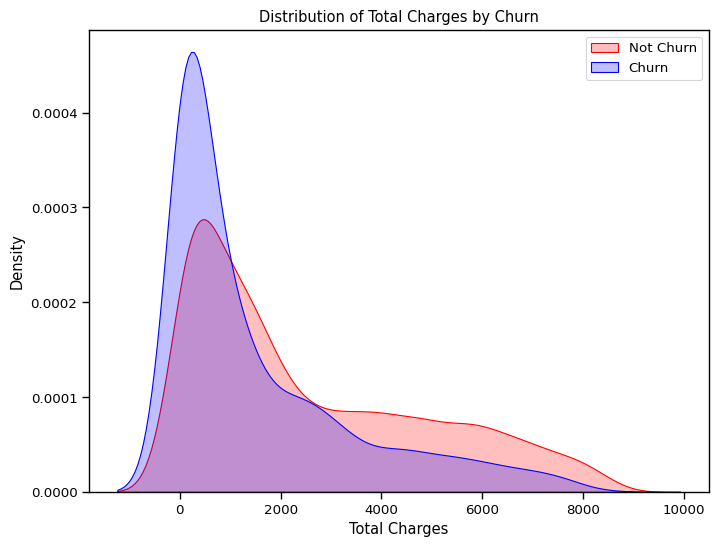

In [38]:
sns.set_context("paper", font_scale=1.1)
plt.figure(figsize=(8, 6))

# Line plot for customers who do not churn (Churn = 0)
sns.kdeplot(df.TotalCharges[df['Churn'] == 0], color='red', label='Not Churn', shade=True)

# Line plot for customers who churn (Churn = 1)
sns.kdeplot(df.TotalCharges[df['Churn'] == 1], color='blue', label='Churn', shade=True)

plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.title('Distribution of Total Charges by Churn')
plt.legend()

plt.show()

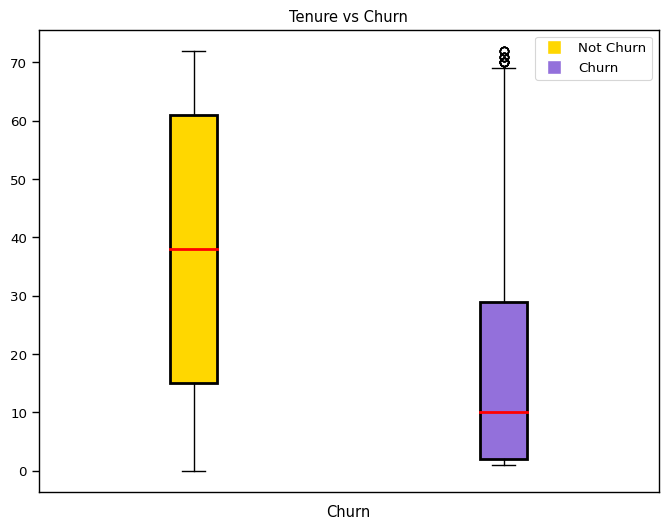

In [39]:
# Define custom colors for 'Churn' categories
colors = ["gold", 'mediumpurple']

# Create a box plot with custom colors
plt.figure(figsize=(8, 6))
boxprops = dict(linewidth=2, color='black')
medianprops = dict(linewidth=2, color='red')
box = plt.boxplot([df['tenure'][df['Churn'] == 0], df['tenure'][df['Churn'] == 1]],
                 vert=True, patch_artist=True, boxprops=boxprops, medianprops=medianprops)

# Set custom colors for each box
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Remove y-axis ticks and labels
plt.xticks([])

# Set y-axis label and title
plt.xlabel('Churn')
plt.title('Tenure vs Churn')

# Add a legend using text annotations
legend_elements = [
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='gold', label='Not Churn', markersize=10),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='mediumpurple', label='Churn', markersize=10),
]
plt.legend(handles=legend_elements)

# Show the figure
plt.show()


## 4.2 Correlation between variables

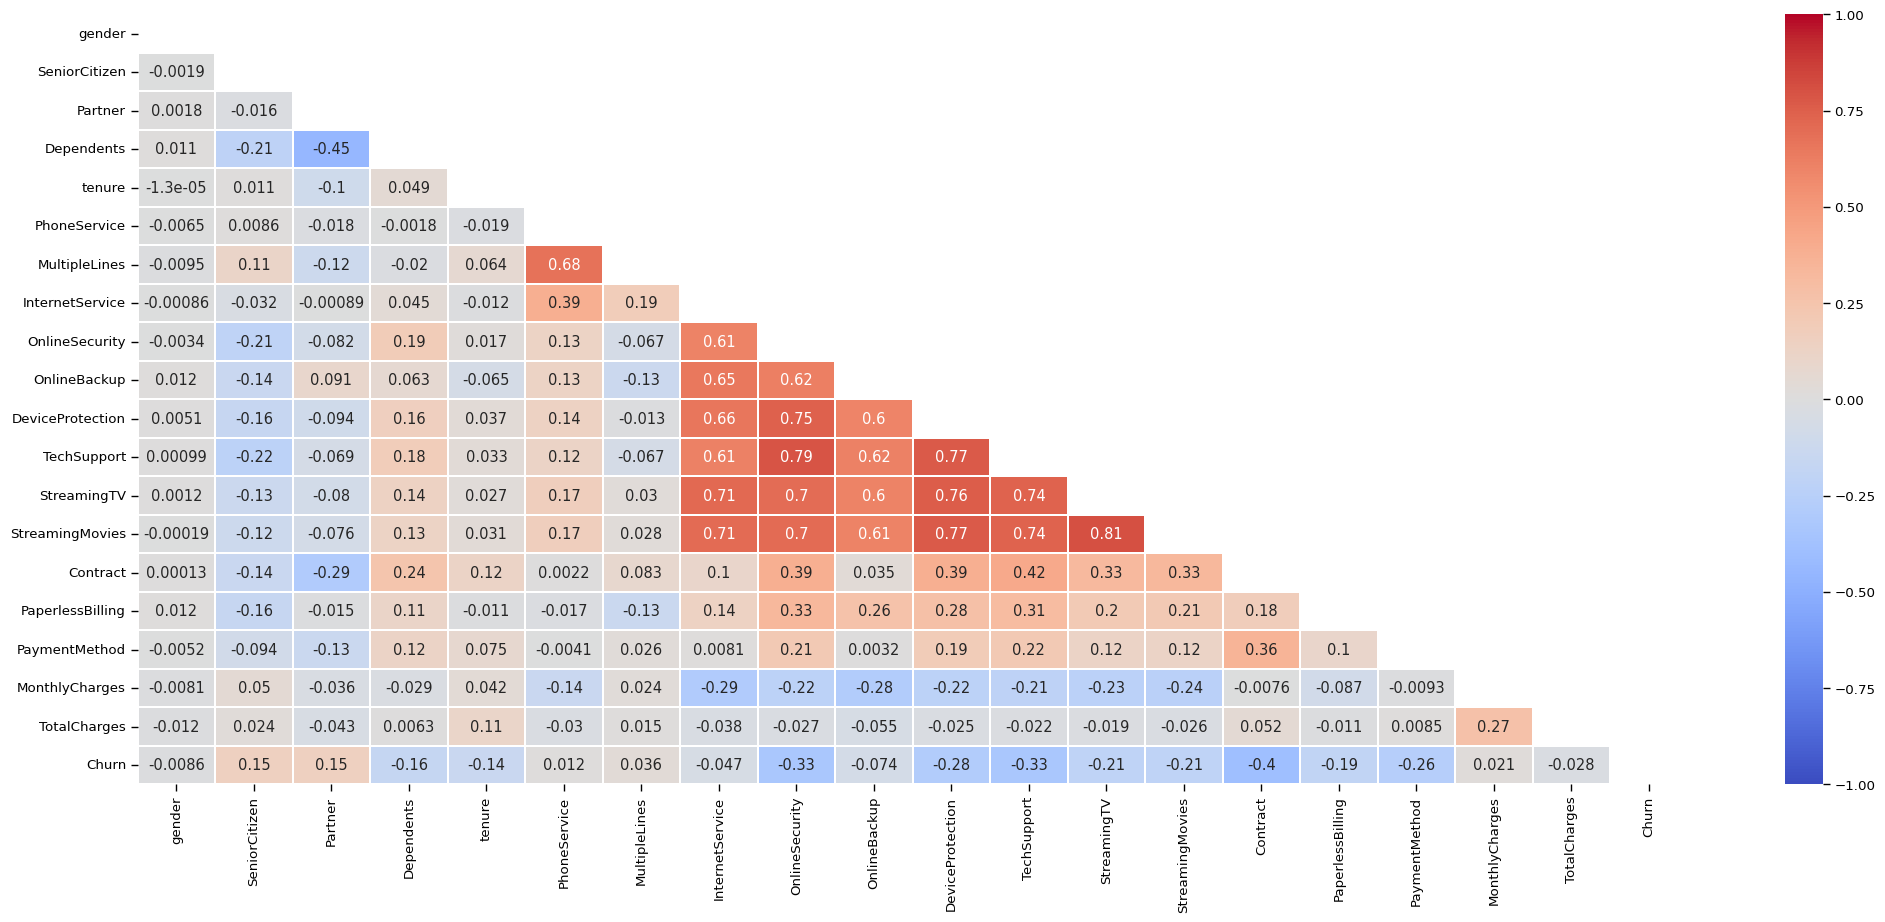

In [40]:
# Correlation between all variables

plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

The matrix is to large and there are too many features, which is hard to observe. Therefore, we will check the correlation of features with respect to Churn

Text(0.5, 1.0, 'Correlation with Churn Rate')

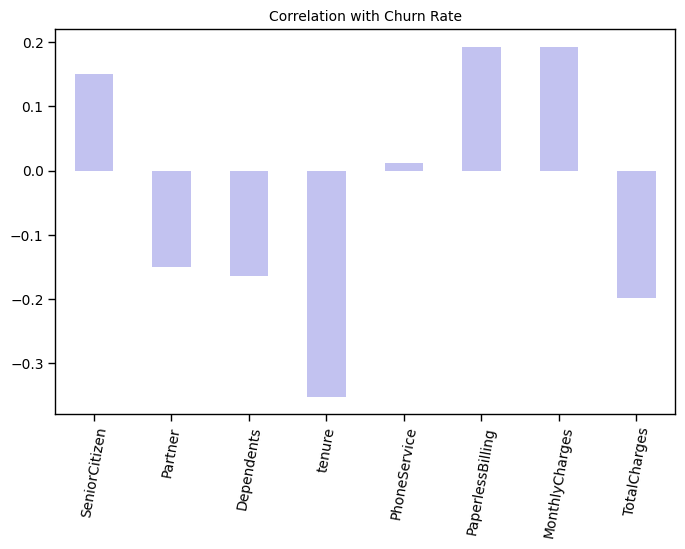

In [41]:
# Correlation between churn and selected boolean and numeric variables
plt.figure
ds_corr = df[['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges']]

correlations = ds_corr.corrwith(df.Churn)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (8, 5),
        fontsize = 10,
        color = '#c2c2f0',
        rot =80, grid = False)

plt.title('Correlation with Churn Rate', horizontalalignment="center", fontstyle = "normal", fontsize = "10", fontfamily = "sans-serif")

In terms of positive correlation with **churn**, there are three variables **senior citizen, paperless billing, and monthly charges**:
- It can be interpreted that senior citizen has tendency to churn. The reasons for that could related to external factors such as competitors.
- A positive relationship between monthly charges and churn is explainable since the more charged amounts per month, the more likely customers churn.
- Interesting insight to notice is that the paperless billing is actually positively correlate with churn.

In terms of negative relationship:
- A longer **tenure** could refer to loyalty, which results in less churn risk. Therefore, the negative relationship is presented.
- In constrast to monthly charges relationship with churn, it is interesting that **total charges** negatively correlated to churn. The reason can be that total charges depend on the time the customer has spent with a company (as tenure also has a negative relationship). Additionally, this variable remains questionable whether it is tracked by the customer in order to understand customer behavior.

Since the Contract type has 3 unique values, we will use **Hot encoding for categorical data** to transform variables having 3 or more than 3 categorical data.

In [42]:
# Copy data to new 'dataset' variable to conserve original values
dataset = df.copy()

# Hot-Encoding for categorical data
dataset = pd.get_dummies(dataset)
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


Text(0.5, 1.0, 'Correlation: Contract type vs. Churn')

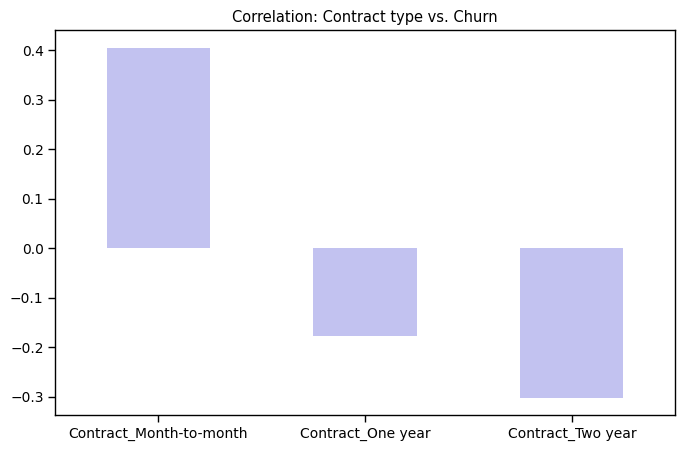

In [43]:
# Correlation: Contract type vs. Churn
plt.figure

ds_contract_type_corr = dataset[['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']]

correlations = ds_contract_type_corr.corrwith(dataset.Churn)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (8,5),
        fontsize = 10,
        color = '#c2c2f0',
        rot=0, grid = False)

plt.title('Correlation: Contract type vs. Churn')

Subscription Month-to-month plan is most exposed to a churn risk. Longer contract duration such as one year and two year is a good strategy to prevent churn.

Text(0.5, 1.0, 'Correlation: Payment method vs. Churn')

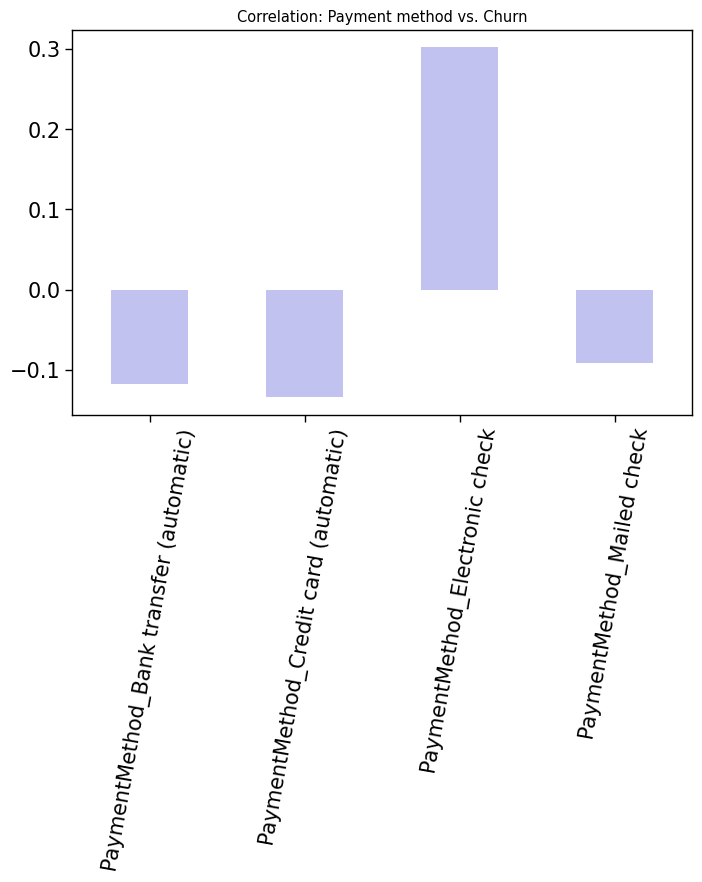

In [44]:
# Correlation: PaymentMethod vs. Churn
plt.figure

ds_payment_method_corr = dataset[['PaymentMethod_Bank transfer (automatic)',
          'PaymentMethod_Credit card (automatic)',
          'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']]

correlations = ds_payment_method_corr.corrwith(dataset.Churn)
correlations = correlations[correlations!=1]

correlations.plot.bar(
        figsize = (8,5),
        fontsize = 15,
        color = '#c2c2f0',
        rot = 80, grid = False)

plt.title('Correlation: Payment method vs. Churn')

From the positive correlation between electronic check payment method and churn, marketing and product team should take consideration to investigate the reasons.

## 4.3 Identify Multicollinearity

High correlation among independent variables gives rise to a phenomenon known as **multicollinearity**, indicating that one independent variable can be predicted from another. Variables exhibiting significant multicollinearity are essentially duplicative and can introduce challenges in model interpretation, potentially leading to overfitting issues.

**Overfitting** is a statistical modeling error that occurs when a function is excessively tailored to a specific set of data points. Consequently, the model's usefulness is limited to the initial dataset and does not generalize well to other datasets.

The **Variable Inflation Factor (VIF)** serves as a valuable tool for assessing multicollinearity. It gauges the strength of a variable's correlation with a group of other independent variables within a dataset. VIF typically starts at 1, and a value exceeding 10 suggests substantial multicollinearity among independent variables.

In [45]:
# Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
# Calculate Variable Inflation Factors
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["Variable Inflation Factors"] = [variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])]
    return(vif)

ds_vif = dataset[['gender', 'SeniorCitizen', 'Partner', 'Dependents',\
                    'tenure', 'PhoneService', 'PaperlessBilling', \
                    'MonthlyCharges','TotalCharges']]

vif = calculate_vif(ds_vif)
vif

,variables,Variable Inflation Factors
0,gender,1.921285
1,SeniorCitizen,1.327766
2,Partner,2.815272
3,Dependents,1.921208
4,tenure,10.549726
5,PhoneService,7.976437
6,PaperlessBilling,2.814154
7,MonthlyCharges,13.988695
8,TotalCharges,12.570370


It is noticeable that **Monthly Charges, Total Charges** have a high VIF score. We will visualise to examine how they are correlated to each other by using scatter plot.

Text(0.5, 1.0, 'Monthly Charges vs. Total Charges collinearity')

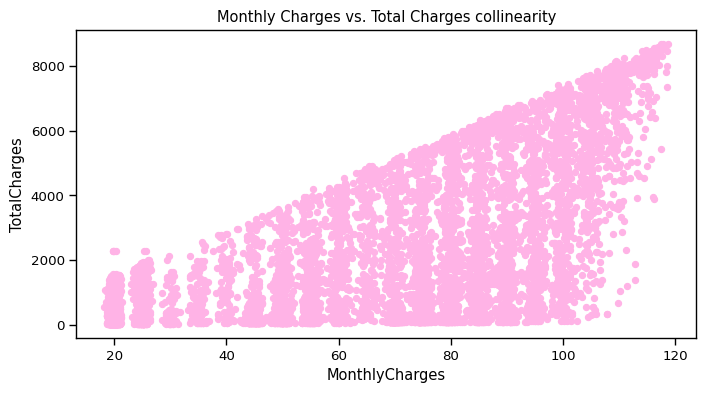

In [46]:
ds_vif[['MonthlyCharges', 'TotalCharges']]\
            .plot.scatter(figsize = (8,4),
                  x ='MonthlyCharges',
                  y='TotalCharges',
                  color = '#ffb3e6')

plt.title('Monthly Charges vs. Total Charges collinearity')

The scatter plot reveals that the **TotalCharges and Monthly Charges** variables exhibit collinearity. To mitigate multicollinearity, it is advisable to eliminate one of these correlated features. The most effective strategy involves discarding the **Total Charges** variable while retaining **Monthly Charges** because of its strong positive correlation with the **Churn** variable.

In [47]:
# Drop 'TotalCharges' from VIF test dataset
ds_vif2 = ds_vif.drop(columns = "TotalCharges")

# Check colinearity again
vif2 = calculate_vif(ds_vif2)
vif2

,variables,Variable Inflation Factors
0,gender,1.879536
1,SeniorCitizen,1.323089
2,Partner,2.814574
3,Dependents,1.908533
4,tenure,3.287603
5,PhoneService,5.963240
6,PaperlessBilling,2.745897
7,MonthlyCharges,7.453993


The removal of the **Total Charges** variable effectively decreased multicollinearity among correlated features in the test dataset, which includes **tenure**. As the final step of our analysis for Machine Learning algorithms, it is essential to exclude **Total Charges** from the primary dataset.

In [48]:
# Drop the "Total Charges" from main dataset
dataset = dataset.drop(columns = "TotalCharges")
print(dataset.dtypes)

gender                                        int8
SeniorCitizen                                 int8
Partner                                       int8
Dependents                                    int8
tenure                                       int64
PhoneService                                  int8
PaperlessBilling                              int8
MonthlyCharges                             float64
Churn                                         int8
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No                            uint8
OnlineSecurity_No internet service           uint8
OnlineSecurity_Yes                           uint8
OnlineBackup_No                              uint8
OnlineBackup_No internet servic

# 5. Build Machine Learning Models

There are two primary categories of machine learning problems:

1. **Supervised Learning**: This type of learning is applied to a dataset of historical data points with the goal of making predictions about future data. Supervised learning can be further categorized into two subtypes:

- **Classification Problems**: These problems involve predicting a discrete set of values or categories. For example, classifying a handwritten character into a known character or determining if an email is spam.

- **Regression**: In regression problems, the objective is to predict a continuous quantity or value for a given set of data. For instance, predicting house prices based on factors such as house size, nearby schools, and other relevant factors, or forecasting sales revenue using historical sales data.

The target variable for **churn** has two states: "yes" or "no," often represented as 1 or 0. This makes it a binary classification problem.

2. Unsupervised Learning: Unsupervised learning is employed to address problems where we have limited or no prior knowledge of the expected outcomes. In this approach, algorithms aim to discover hidden patterns or structures within the data and group or cluster the data in a way that makes the most sense based on the available information. An example of unsupervised learning includes neural networks, such as those used in chatbots like the LEX session.

In summary, in this dataset, we will **use supervised learning algorithms**.

In [49]:
# Split the dataset into features (X) and target variable (y)

X = dataset.drop(columns=['Churn'])  # Features
y = dataset['Churn']  # Target variable

In [50]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [51]:
# Check for missing values in the training set
missing_train = X_train.isnull().sum()
print("Missing values in training set:")
print(missing_train[missing_train > 0])

# Check for missing values in the test set
missing_test = X_test.isnull().sum()
print("\nMissing values in test set:")
print(missing_test[missing_test > 0])

Missing values in training set:
Series([], dtype: int64)

Missing values in test set:
Series([], dtype: int64)


## 5.1. kNN

In [52]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [53]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

Accuracy of K-Nearest Neighbor:  0.7808802650260294

Classification Report :

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1552
           1       0.62      0.44      0.52       561

    accuracy                           0.78      2113
   macro avg       0.72      0.67      0.69      2113
weighted avg       0.77      0.78      0.77      2113



<Figure size 640x480 with 0 Axes>

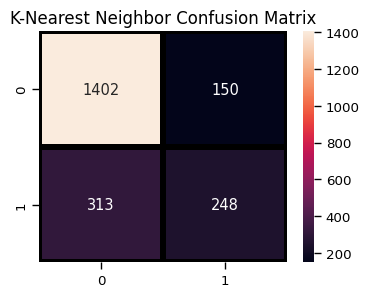

In [54]:
knn_model = KNeighborsClassifier(n_neighbors = 10)

knn_model.fit(X_train,y_train)

# Evaluate model
accuracy_knn = knn_model.score(X_test,y_test)
print("Accuracy of K-Nearest Neighbor: ", accuracy_knn)
print("")
# Classification report
knn_prediction = knn_model.predict(X_test)
print("Classification Report :")
print("")
print(classification_report(y_test, knn_prediction))

plt.figure(14)
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, knn_prediction),
                annot=True, fmt = "d", linecolor="k", linewidths=3)

plt.title("K-Nearest Neighbor Confusion Matrix", fontsize=12)
plt.show()

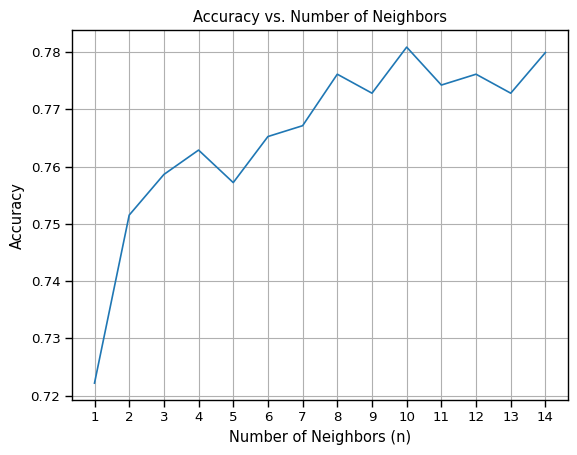

Accuracies for different values of n are: [0.7221959299574066, 0.751538097491718, 0.7586370089919545, 0.7628963558920966, 0.7572172266919073, 0.7652626597255088, 0.7671557027922385, 0.7761476573592049, 0.7728348319924279, 0.7808802650260294, 0.7742546142924751, 0.7761476573592049, 0.7728348319924279, 0.7799337434926644]


In [55]:
a_index = list(range(1, 15))
accuracies = []  # Initialize an empty list to store accuracy values

for i in a_index:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, prediction)
    accuracies.append(accuracy)

# Plot the accuracy values
import matplotlib.pyplot as plt

plt.plot(a_index, accuracies)
plt.xticks(a_index)
plt.xlabel('Number of Neighbors (n)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.grid(True)
plt.show()

print('Accuracies for different values of n are:', accuracies)

## 5.2. SVM

Accuracy of Support Vector Machine:  0.791292001893043

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1552
           1       0.68      0.40      0.50       561

    accuracy                           0.79      2113
   macro avg       0.75      0.67      0.69      2113
weighted avg       0.78      0.79      0.77      2113




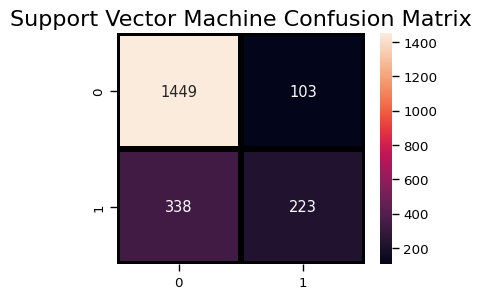

In [56]:
svc_model = SVC(random_state = 42)
svc_model.fit(X_train,y_train)

# Evaluate model
accuracy_svc = svc_model.score(X_test,y_test)
print("Accuracy of Support Vector Machine: ", accuracy_svc)
print("")

# Classification repoort
svc_prediction = svc_model.predict(X_test)
print(classification_report(y_test, svc_prediction))
print("")

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, svc_prediction),
                annot=True, fmt = "d", linecolor="k", linewidths=3)


plt.title("Support Vector Machine Confusion Matrix", fontsize=16)
plt.show()


## 5.3. Random Forest Classifier

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy of Random Forest:  0.8031235210601041

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1552
           1       0.69      0.48      0.56       561

    accuracy                           0.80      2113
   macro avg       0.76      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113




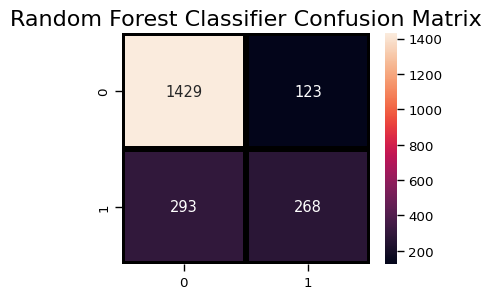

In [57]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=500,
                                  oob_score = True, n_jobs = -1,
                                  random_state=42, max_features = "auto",
                                  max_leaf_nodes = 30)

random_forest_model.fit(X_train, y_train)

# Evaluate model
accuracy_random_forest = random_forest_model.score(X_test, y_test)
print("Accuracy of Random Forest: ", accuracy_random_forest)
print("")

# Classification report
random_forest_prediction = random_forest_model.predict(X_test)
print(classification_report(y_test, random_forest_prediction))
print("")

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, random_forest_prediction),
                annot=True, fmt = "d", linecolor="k", linewidths=3)

plt.title("Random Forest Classifier Confusion Matrix", fontsize=16)
plt.show()

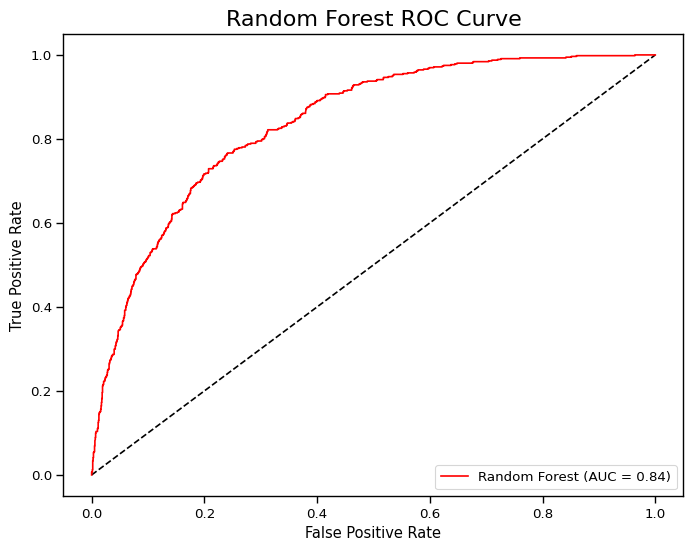

In [58]:
from sklearn.metrics import auc

y_rfpred_prob = random_forest_model.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)

# Calculate AUC
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve', fontsize=16)
plt.legend(loc='lower right')
plt.show()

## 5.4. Decision Tree Classifier

Accuracy of Decision Tree:  0.7236157122574538

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1552
           1       0.48      0.49      0.49       561

    accuracy                           0.72      2113
   macro avg       0.65      0.65      0.65      2113
weighted avg       0.73      0.72      0.72      2113




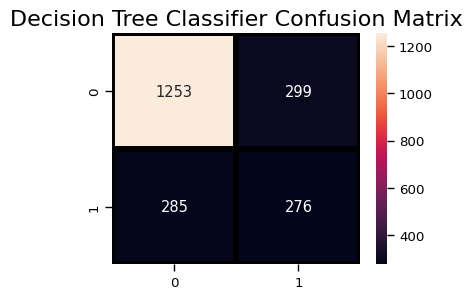

In [59]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train,y_train)

# Evaluate model
accuracy_decision_tree = decision_tree_model.score(X_test, y_test)
print("Accuracy of Decision Tree: ", accuracy_decision_tree)
print("")

# Decision Tree Classifier gives very low accuracy score.

# Classification report
decision_tree_prediction = decision_tree_model.predict(X_test)
print(classification_report(y_test, decision_tree_prediction))
print("")

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, decision_tree_prediction),
                annot=True, fmt="d", linecolor="k", linewidths=3)

plt.title("Decision Tree Classifier Confusion Matrix", fontsize=16)
plt.show()

## 5.5. Logistic Regression

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Regression:  0.8002839564600095

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.65      0.54      0.59       561

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113




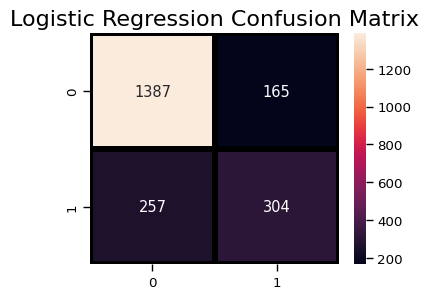

In [60]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train, y_train)

# Evaluate model
accuracy_logistic_regression = logistic_regression_model.score(X_test,y_test)
print("Accuracy of Logistic Regression: ", accuracy_logistic_regression)
print("")

# Classification report
logistic_regression_prediction = logistic_regression_model.predict(X_test)
logistic_regression_report = classification_report(y_test, logistic_regression_prediction)

print(logistic_regression_report)
print("")

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, logistic_regression_prediction),
                annot=True, fmt="d", linecolor="k", linewidths=3)

plt.title("Logistic Regression Confusion Matrix", fontsize=16)
plt.show()

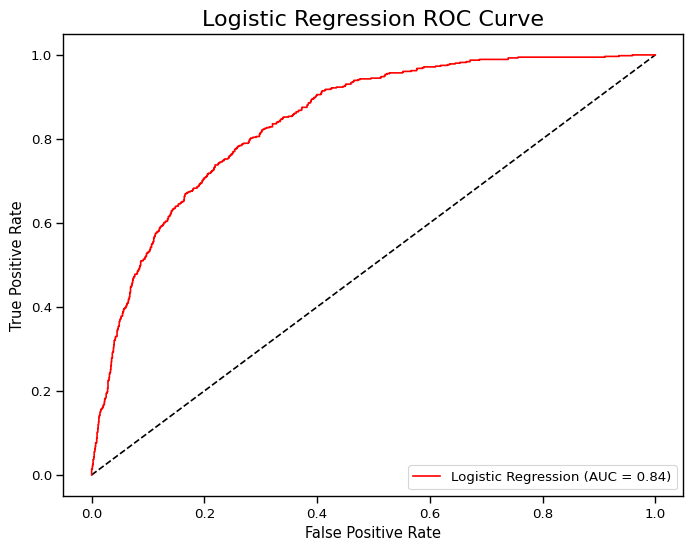

In [61]:
y_pred_prob = logistic_regression_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC
roc_auc_lr = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = f'Logistic Regression (AUC = {roc_auc_lr:.2f})', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve', fontsize=16)
plt.legend(loc='lower right')
plt.show()

## Summary

In [62]:
xyz = []

classifiers = ['SVC', 'Random Forest Classifier', 'Logistic Regression', 'kNN', 'Decision Tree']
models = [SVC(random_state=42), RandomForestClassifier(n_estimators=500, random_state=42), 
          LogisticRegression(solver='liblinear'), KNeighborsClassifier(n_neighbors=10), 
          DecisionTreeClassifier(random_state=42)]

for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    accuracy = metrics.accuracy_score(prediction, y_test)
    xyz.append(accuracy)

models_dataframe = pd.DataFrame(xyz, index=classifiers, columns=['Accuracy'])
models_dataframe

,Accuracy
SVC,0.791292
Random Forest Classifier,0.777567
Logistic Regression,0.800284
kNN,0.780880
Decision Tree,0.723616


## 6. Improve Model Accuracy

## 6.1. Feature Extraction/ Selection

- Excessive features can have a detrimental impact on algorithm accuracy, especially when these features exhibit correlations or do not align with the fundamental assumptions of the algorithm regarding input data characteristics.

- Feature extraction serves as a strategy for enhancing algorithm accuracy by isolating essential features. This, in turn, not only trims down training time but also mitigates issues related to overfitting.

Two primary methods for feature selection are available:

1. **Correlation Matrix**: This approach focuses on retaining only those features that exhibit minimal correlations with each other.

2. **RandomForestClassifier**: It determines feature importance by assessing their relative significance, aiding in the selection of the most influential features.

### Correlation Matrix

Text(0.5, 1.0, 'Correlation w. Churn')

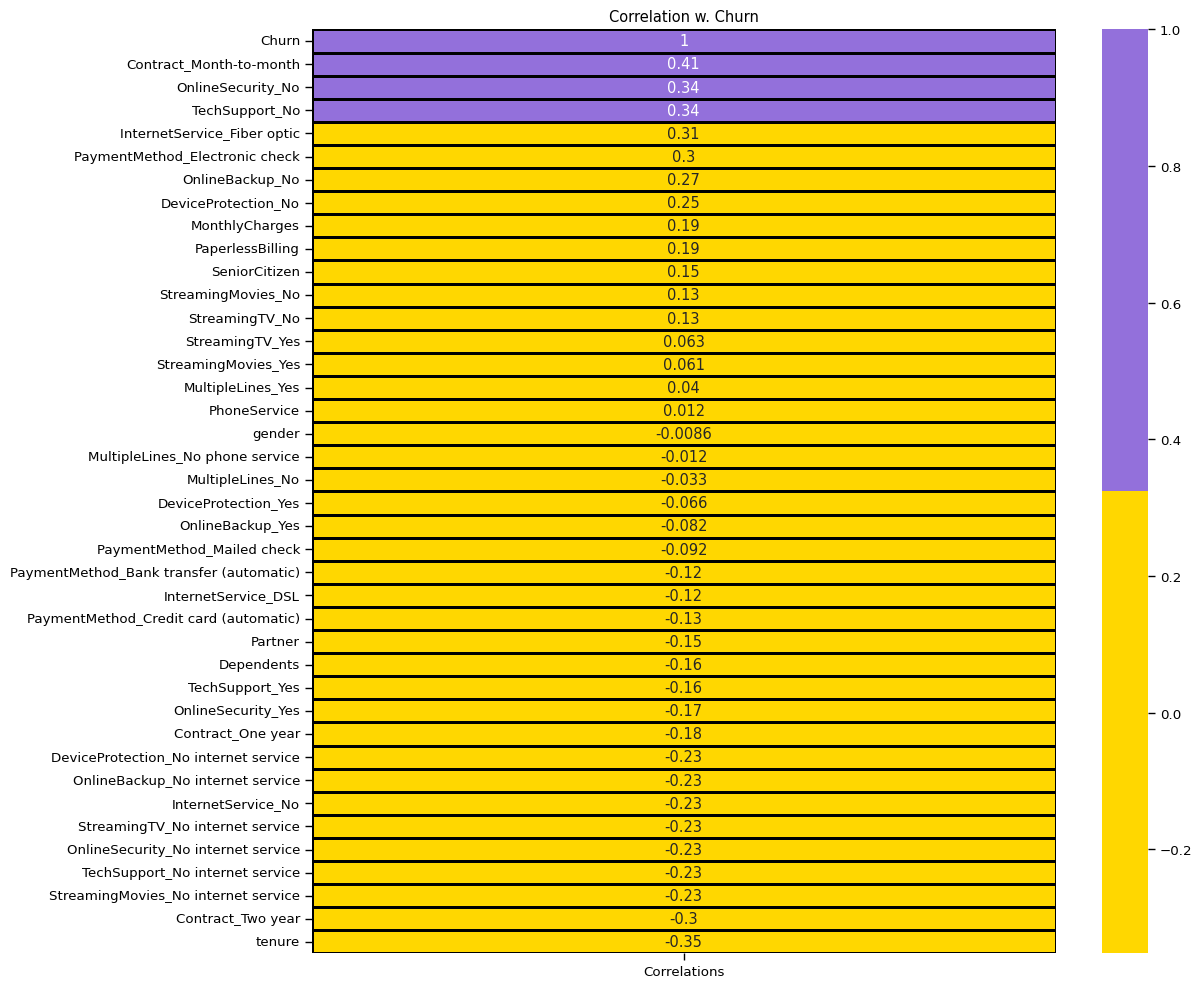

In [63]:
corr = dataset.corrwith(df['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (12,12))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 2,linecolor = 'black');
plt.title('Correlation w. Churn')

- From the correlation matrix graph above, the features having correlation coefficient ranging from -0.1 to 0.1 will be dropped: StreamingTV_Yes, SteamingMovies_Yes, MultipleLines_Yes, PhoneService, gender, MultipleLines_No, Multiplelines_No phone service, DeviceProtection_Yes, OnlineBackup_Yes, PaymentMethod_Mailed check.

- The remaing features either positively or negatively correlated with Churn.

- Having performed the the vif, Total Charges is also excluded from the set.

## 6.2. Standardisation

Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# List of columns to exclude
columns_to_exclude = ['StreamingTV_Yes', 'StreamingMovies_Yes', 'MultipleLines_Yes', 'PhoneService',
                      'gender','MultipleLines_No', 'MultipleLines_No phone service', 'DeviceProtection_Yes',
                      'OnlineBackup_Yes', 'PaymentMethod_Mailed check']

# Create a new DataFrame with excluded columns
selected_features = dataset.drop(columns=columns_to_exclude)

# Extract the target variable
telco_target = selected_features['Churn']

# Extract the feature columns
telco_features = selected_features.drop(columns=['Churn'])

# Standardization
scaler = StandardScaler()
telco_features_standard = scaler.fit_transform(telco_features)
telco_features_standard = pd.DataFrame(telco_features_standard, columns=telco_features.columns)

# Split the dataset into training and testing sets
X_telco = telco_features_standard
y_telco = telco_target

X_telco_train, X_telco_test, y_telco_train, y_telco_test = train_test_split(X_telco, y_telco, test_size=0.25, random_state=42, stratify=y_telco)

In [65]:
abc = []
classifiers = ['SVC','Random Forest Classifier','Logistic Regression','kNN','Decision Tree']
models = [SVC(random_state=42), RandomForestClassifier(n_estimators=500, random_state=42),
          LogisticRegression(solver='liblinear'), KNeighborsClassifier(n_neighbors=10),
          DecisionTreeClassifier(random_state=42)]

for i in models:
    model = i
    model.fit(X_telco_train,y_telco_train)
    prediction=model.predict(X_telco_test)
    abc.append(metrics.accuracy_score(prediction,y_telco_test))

new_models_dataframe=pd.DataFrame(abc,index=classifiers)   
new_models_dataframe.columns=['New Accuracy']

In [66]:
new_models_dataframe=new_models_dataframe.merge(models_dataframe,left_index=True,right_index=True,how='left')
new_models_dataframe['Increase']=new_models_dataframe['New Accuracy']-new_models_dataframe['Accuracy']
new_models_dataframe

,New Accuracy,Accuracy,Increase
SVC,0.792164,0.791292,0.000872
Random Forest Classifier,0.778535,0.777567,0.000967
Logistic Regression,0.796706,0.800284,-0.003578
kNN,0.778535,0.780880,-0.002345
Decision Tree,0.746735,0.723616,0.023119


The dataframe illustrates the accuracy of the models after applying feature selection. We observe that the accuracy for **SVM** slightly increases by nearly 0.087%, the accuracy rate of **Random Forest Classifier** is improved by 0.097%. For the **kNN** and **Logistic Regression** model, the accuracy rate unfortunately decreases 0.23% and 0.36% respectively. Lastly, **Decision Tree** model generates result more accurate by 2.3%.

## 6.3. Cross Validation

In [67]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation

In [68]:
# k=5, split the data into 5 equal parts

kfold = KFold(n_splits=5, shuffle=True, random_state=22)

In [69]:
xyz = []
accuracy = []
classifier_names = [
    ('kNN', KNeighborsClassifier()),
    ('SVM', SVC()),
    ('Random Forest', RandomForestClassifier(n_estimators=500, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(solver='liblinear'))
]

for name, model in classifier_names:
    cv_result = cross_val_score(model, X_telco, y_telco, cv=kfold, scoring="accuracy")
    xyz.append(cv_result.mean())
    accuracy.append(cv_result)

new_models_df = pd.DataFrame(xyz, index=[name for name, _ in classifier_names], columns=['CV Mean'])
new_models_df

,CV Mean
kNN,0.759052
SVM,0.793981
Random Forest,0.778221
Decision Tree,0.727246
Logistic Regression,0.801649


## 6.4. Ensembling

In [70]:
SVM = SVC(random_state = 42, C = 0.1, probability = True)
LR = LogisticRegression(C = 0.1)
kNN = KNeighborsClassifier(n_neighbors=8)
RF = RandomForestClassifier(random_state=42, n_estimators=500)
DT = DecisionTreeClassifier(random_state=42)

# Set probability=True for all models to enable probability estimates
kNN.probability = True
RF.probability = True
DT.probability = True

In [71]:
#for Voting Classifier

from sklearn.ensemble import VotingClassifier 

# ***SVM with LR***

In [72]:
ens_results = []

ensemble_SVM_LR = VotingClassifier(estimators=[('SVC', SVM), ('LR', LR)], 
                       voting='soft', weights=[2, 1]).fit(X_telco_train, y_telco_train)

ens_results.append(ensemble_SVM_LR.score(X_telco_test, y_telco_test))

print('The accuracy for SVM and LR is:', round(ensemble_SVM_LR.score(X_telco_test, y_telco_test),2))

The accuracy for SVM and LR is: 0.79


# ***SVM with kNN***

In [73]:
ensemble_SVM_kNN = VotingClassifier(estimators=[('SVM', SVM), ('kNN', kNN)], 
                       voting='soft', weights=[2, 1]).fit(X_telco_train, y_telco_train)

ens_results.append(ensemble_SVM_kNN.score(X_telco_test, y_telco_test))

print('The accuracy for SVM and kNN is:', round(ensemble_SVM_kNN.score(X_telco_test, y_telco_test),2))

The accuracy for SVM and kNN is: 0.79


# ***SVM with RF***

In [74]:
ensemble_SVM_RF = VotingClassifier(estimators=[('SVM', SVM), ('RF', RF)], 
                       voting='soft', weights=[2, 1]).fit(X_telco_train, y_telco_train)

ens_results.append(ensemble_SVM_RF.score(X_telco_test, y_telco_test))

print('The accuracy for SVM and RF is:', ensemble_SVM_RF.score(X_telco_test, y_telco_test))

The accuracy for SVM and RF is: 0.7961385576377058


# ***SVM with DT***

In [75]:
ensemble_SVM_DT = VotingClassifier(estimators=[('SVM', SVM), ('DT', DT)], 
                       voting='soft', weights=[2, 1]).fit(X_telco_train, y_telco_train)

ens_results.append(ensemble_SVM_DT.score(X_telco_test, y_telco_test))

print('The accuracy for SVM and DT is:',ensemble_SVM_DT.score(X_telco_test, y_telco_test))

The accuracy for SVM and DT is: 0.7921635434412265


# ***LR with kNN***

In [76]:
ensemble_LR_kNN = VotingClassifier(estimators=[('LR', LR), ('kNN', kNN)], 
                       voting='soft', weights=[2, 1]).fit(X_telco_train, y_telco_train)

ens_results.append(ensemble_LR_kNN.score(X_telco_test, y_telco_test))

print('The accuracy for LR and kNN is:',ensemble_LR_kNN.score(X_telco_test, y_telco_test))

The accuracy for LR and kNN is: 0.7932992617830777


# ***LR with RF***

In [77]:
ensemble_LR_RF = VotingClassifier(estimators=[('LR', LR), ('RF', RF)], 
                       voting='soft', weights=[2, 1]).fit(X_telco_train, y_telco_train)

ens_results.append(ensemble_LR_RF.score(X_telco_test, y_telco_test))

print('The accuracy for LR and RF is:',ensemble_LR_RF.score(X_telco_test, y_telco_test))

The accuracy for LR and RF is: 0.7989778534923339


# ***LR with DT***

In [78]:
ensemble_LR_DT = VotingClassifier(estimators=[('LR', LR), ('RF', DT)], 
                       voting='soft', weights=[2, 1]).fit(X_telco_train, y_telco_train)
ens_results.append(ensemble_LR_DT.score(X_telco_test, y_telco_test))
print('The accuracy for LR and DT is:', ensemble_LR_DT.score(X_telco_test, y_telco_test))

The accuracy for LR and DT is: 0.7796706416808632


# ***kNN with RF***

In [79]:
ensemble_kNN_RF = VotingClassifier(estimators=[('kNN', kNN), ('RF', RF)], 
                       voting='soft', weights=[2, 1]).fit(X_telco_train, y_telco_train)
ens_results.append(ensemble_kNN_RF.score(X_telco_test, y_telco_test))
print('The accuracy for RF and kNN is:',ensemble_kNN_RF.score(X_telco_test, y_telco_test))

The accuracy for RF and kNN is: 0.78137421919364


# ***kNN with DT***

In [80]:
ensemble_kNN_DT = VotingClassifier(estimators=[('kNN', kNN), ('DT', DT)], 
                       voting='soft', weights=[2, 1]).fit(X_telco_train, y_telco_train)
ens_results.append(ensemble_kNN_DT.score(X_telco_test, y_telco_test))
print('The accuracy for kNN and DT is:',ensemble_kNN_DT.score(X_telco_test, y_telco_test))

The accuracy for kNN and DT is: 0.7853492333901193


# ***RF with DT***

In [81]:
ensemble_RF_DT = VotingClassifier(estimators=[('RF', RF), ('DT', DT)], 
                       voting='soft', weights=[2, 1]).fit(X_telco_train, y_telco_train)
ens_results.append(ensemble_RF_DT.score(X_telco_test, y_telco_test))
print('The accuracy for RF and DT is:',ensemble_RF_DT.score(X_telco_test, y_telco_test))

The accuracy for RF and DT is: 0.7768313458262351


# ***All 5 classifiers combined***

In [82]:
ensembled=VotingClassifier(estimators=[('SVM', SVM), ('LR', LR),('RF', RF), ('DT', DT), ('kNN', kNN) ], 
                       voting='soft', weights=[2,1,3, 4, 5]).fit(X_telco_train,y_telco_train)
ens_results.append(ensembled.score(X_telco_test,y_telco_test))
print('The ensembled model with all the 5 classifiers is:',ensembled.score(X_telco_test, y_telco_test))

The ensembled model with all the 5 classifiers is: 0.7864849517319704


- So the maximum Accuracy which we could get by using ensemble models is 79% .

- Below we can see the results of all our ensemble models together.

In [83]:
classifiers_set = ['SVM with LR', 'SVM with kNN', 'SVM with DT', 'SVM with RF',
                     'LR with DT', 'LR with kNN', 'LR with RF',
                     'DT with RF', 'DT with kNN',
                     'RF with kNN', 'All 5 classifiers combined']
models_combined = pd.DataFrame(ens_results, index = classifiers_set)
models_combined.columns = ['Accuracy']

# Find the row with the highest accuracy
max_accuracy_row = models_combined['Accuracy'].idxmax()

# Create a copy of the DataFrame with the highest value highlighted
highlighted_models_combined = models_combined.style.apply(
    lambda x: ['background-color: yellow' if x.name == max_accuracy_row else '' for i in x], axis=1)

# Display the highlighted DataFrame
highlighted_models_combined

,Accuracy
SVM with LR,0.788189
SVM with kNN,0.793299
SVM with DT,0.796139
SVM with RF,0.792164
LR with DT,0.793299
LR with kNN,0.798978
LR with RF,0.779671
DT with RF,0.781374
DT with kNN,0.785349
RF with kNN,0.776831
